<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Проект: отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Данные

Данные находятся в файле /datasets/Churn.csv

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

Задача классификации, используем соответствующие алгоритмы

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
warnings.filterwarnings('ignore')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Предварительные выводы**
1. Неудобные заголовки, требуют замены на маленькие буквы с подчеркиванием между слов.
2. Признак "Tenure", содержит 809 пропусков. Их необходимо либо удалить, либо заполнить.
3. Есть признаки, без которых на первый взгляд таблица станет лучше, так как они никак не влияют на результат - RowNumber, Surname - оба эти признака вполне может заменить один СustomerId. Тем не менее необходимо попробовать обучить модели как с ними так и без них.
4. Текстовые категорийные признаки Gender, Geografhy необходимо перевести в цифровой формат. Попробовать разные методы.
6. Balance и EstimatedSalary имеют очень широкий диапазон значений и требуют масштабирования.
7. Между количественными значениями вероятно нет корреляции, необходим контроль.

In [3]:
# меняем заголовки
data = data.rename(columns={'CreditScore':'credit_score', 'Geography':'geography', 'Gender':'gender',
                           'Age':'age', 'Tenure':'tenure', 'Balance':'balance', 'NumOfProducts':'num_of_products',
                            'HasCrCard':'has_cr_card','IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary',
                            'Exited':'exited','RowNumber':'row_number','CustomerId':'customer_id','Surname':'surname'})

display(data.head(1))

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1


**Комментарий** При удалении строк с пропусками в Tenure, метрики ухудшаются, и вообще при любом простом уменьшении количества объектов в обучаемой модели метрики ухудшаются. Например, если предложеные данные разделить только на обучающую и валидирующие выборки, то с первой попытки при неглубоких гиперпараметрах получается метрика F1 больше 0.59, но стоит отделить "кусочек" для тестирования, эта метрика, на меньших количества обучающих объектов резко ухудшается. 
Поэтому Tenure заменяем. Первый вариант замены был основан на том, что клиенты в банке заводились последоватедльно, а значит customer_id им присваливался по очереди их регистрации в банке, а значить пропущенный tenure можно было легко установить по ближайшим customer_id, к сожалению это оказалось не так. Более грубый вариант, основан на предположении, что более возрастной клиент имеет соответственно и дольшую историю в банке и люди одного возраста будут иметь сходную по длительности историю в банке. Поэтому можно установить пропущенные значения как среднее значение tenure в возрастной группе, или медиану. Это решение и реализовано.

In [4]:
# избавляемся от пропусков tenure
# формируем словарь dic_tenure средних tenure по возрасту 
dic_tenure = data.groupby('age')['tenure'].mean()
#dic_tenure = data.groupby('age')['tenure'].median()

# функция возвращает среднюю величину tenure из словаря dic_tenure, кторый виден для нее как глобальная переменная
def mean_tenure(row):
    return dic_tenure[row['age']]

#заменяем  nan на среднее по возрасту
data['tenure'] = data['tenure'].fillna(data.apply(mean_tenure, axis=1))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
row_number          10000 non-null int64
customer_id         10000 non-null int64
surname             10000 non-null object
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Комментарий** Перевод текстовых признаков в численные методом прямого кодирования OHE  хорошо отработает только в колонке gender и geography (так как было всего три страны). Признак surname имеет большое количество значений и этот метод очень сильно увеличивает количество столбцов и значительно замедляет работу. Забегая вперед, отмечу, что получаемые метрики с ним оказались плохими при таком методе кодирования. Возможно хорошим был бы результат, когда gender кодируется прямым методом, а surname порядковым. Поэтому при использовании OHE - признак surname удаляем.

In [5]:
# переводим категориальные данные в индексы с удалением зависимых колонок метод OHE
# предварительно удалим колонку surname иначе она сильно замедлит процесс обучения и дает неадекватный результат.
# data = data.drop(['surname','row_number','customer_id'], axis=1) # вариант с удаление не значащих параметров
data = data.drop('surname', axis=1)
df = pd.get_dummies(data, drop_first=True)
display(df.head(5))

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Комментарии** Порядковое кодирование категориальных параметров также дает хороший результат для алгоритмов решающего дерева и случайного леса, при этом столбец surname лучше не удалять, это дает большие значения метрики F1. Но что бы не раздувать проект, оставимся на одном способе. Тем не менее код я не удалял, а только закомментировал, что бы обозначить возможность и отличительные особенности.

**Комментарий** Линейных корреляций не обнаружено, предполагаем отсутствие мультиколлинеарности.

In [7]:
display(df.corr())

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
row_number,1.000000,0.004202,0.005840,0.000783,-0.006435,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
customer_id,0.004202,1.000000,0.005308,0.009497,-0.020562,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
credit_score,0.005840,0.005308,1.000000,-0.003965,-0.000370,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
age,0.000783,0.009497,-0.003965,1.000000,-0.014779,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
tenure,-0.006435,-0.020562,-0.000370,-0.014779,1.000000,-0.007584,0.011474,0.026221,-0.031111,0.009750,-0.015964,-0.003149,0.000664,0.012290
balance,-0.009067,-0.012419,0.006268,0.028308,-0.007584,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
num_of_products,0.007246,0.016972,0.012238,-0.030680,0.011474,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
has_cr_card,0.000599,-0.014025,-0.005458,-0.011721,0.026221,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
is_active_member,0.012044,0.001665,0.025651,0.085472,-0.031111,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
estimated_salary,-0.005988,0.015271,-0.001384,-0.007201,0.009750,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112


**Комментарий** В списке numeric сразу определяем признаки для масштабирования. 

In [8]:
# с методом OHE применяем такой список для масштабирования дал лучший результат в финале
#numeric = ['balance', 'credit_score', 'estimated_salary','age','tenure'] # урезанный список, если удалять колонки row_number и customer_id
numeric = ['row_number','balance', 'credit_score', 'estimated_salary', 'customer_id','age','tenure']

**Комментарий** Разбиваем выборки на учебную, валидационную и тестовую 60-20-20 . Как оказалось порядок разбития сильно влияет на полученные метрики. Возможно это особенность гиперпараметра random_state. При 12345 и test_size 0.2 и 0.25 соответственно, я ни при каком балансировании, и изменении глубин методов не смог приблизиться к величине F1=0.59, зато стоило мне изменить очередность разбития базового датафрейма и указать теst_size 0.2 и 0.75, как сразу получил нужный результат. Шаманство какое то. Ведь суть не меняется, разбитие данных по выборкам всё равно остается 60-20-20 !!! Получается, что оно делается не случаным образом .....

In [9]:
## Отделяем признаки от целевого 
target = df['exited']
features = df.drop('exited', axis=1)

#Разделяем объекты на 3 части 60% (6000 объектов) обучающий набор данных и по 20% (2000 объекта) валидационный и тестовый
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
features_test, features_train, target_test, target_train = train_test_split(features_train, target_train, test_size=0.75, random_state=12345) 

print('размер обучающей выборки :', features_train.shape,' целевых признаков:', target_train.shape)
print('размер валидационной выборки :', features_valid.shape,' целевых признаков:', target_valid.shape)
print('размер тестовой выборки :', features_test.shape,' целевых признаков:', target_test.shape)

размер обучающей выборки : (6000, 13)  целевых признаков: (6000,)
размер валидационной выборки : (2000, 13)  целевых признаков: (2000,)
размер тестовой выборки : (2000, 13)  целевых признаков: (2000,)


**Комментарий** Масштабирование выделиляем в отдельную функцию, так как приходится много раз ее "включать" и выключать в процессе подбора параметров моделей.

In [10]:
# масштабируем числовые колонки из ранее определенного списка numeric.

def scaler_on(column):
    scaler = StandardScaler()
    scaler.fit(features_train[column]) 
    pd.options.mode.chained_assignment = None
    features_train[column] = scaler.transform(features_train[column])
    features_valid[column] = scaler.transform(features_valid[column])
    features_test[column] = scaler.transform(features_test[column])
    
scaler_on(numeric)
display(features_train.head(3))

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2358,-0.907816,-0.362539,0.192115,0.379225,-1.452796,1.395338,1,0,1,-1.469589,0,0,1
8463,1.201789,-0.422088,-1.293791,0.946739,-1.089830,-1.220081,1,1,0,0.243225,0,1,1
163,-1.666306,-0.148993,0.732444,-0.282874,-1.089830,-1.220081,2,1,1,0.112313,0,1,0


**ВЫВОД** Данные подготовлены для работы

## Исследование задачи

**Комментарий** Дисбаланс в сторону отрицательного класса 4 к 1

In [11]:
# баланс класов у целевого признака exited
print('класс 0 доля:  {:.2f}  класс 1 доля:  {:.2f} '.format(target_train[target_train==0].count()/len(target_train),target_train[target_train==1].count()/len(target_train)))

класс 0 доля:  0.80  класс 1 доля:  0.20 


**Комментарий** Выносим в отдельную функцию расчет и печать метрик. Это сильно сократит код а двльнейшем.

In [12]:
# создаем отдельную функцию print_score для печати метрик
# model - аргумент, обученная модель
# is_valid - параметр, переключает расчет на валидационную и тестовую выборки, по умолчанию True
# auc_roc_on - параметр, включает/выключает расчет и печать соответствующей метрики, по умолчанию False
# функция считает и печатает метрики F1, Accuracy, Recall, Precision

def print_score(model, is_valid = True, auc_roc_on = False):
    if  is_valid: # переключаем выборки
        features = features_valid
        target = target_valid
    else:
        features = features_test
        target = target_test
        
    predicted = model.predict(features)
    
    f1 = f1_score(target, predicted)
    accuracy = accuracy_score(target, predicted)
    recall = recall_score(target, predicted)
    precision = precision_score(target, predicted)
    
    print('F1     = {:.2f}   Accuracy = {:.2f}'.format(f1,accuracy))
    print('Recall = {:.2f}   Precision= {:.2f}'.format(recall, precision))
    
    
    if auc_roc_on: # включается расчет одноименной метрики
        probabilities_test = model.predict_proba(features)
        probabilities_one_test = probabilities_test[:, 1]
        auc_roc = roc_auc_score(target, probabilities_one_test)
        print('AUC-ROC= {:.2f} '.format(auc_roc))
    
    if f1 > 0.59:
        print('УСПЕХ !!!') # Печатаем, если достигнута поставленная цель, F1 мера выше 0.59
    print()

**Комментарий** Обучаем модель в лоб, без балансировки и без изменения гиперпараметров. 

In [13]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
print("Логистическая регрессия:")
print_score(model)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
print("Дерево решений:")
print_score(model)

model = RandomForestClassifier(random_state=12345,) 
model.fit(features_train, target_train)
print("Случайный лес:")
print_score(model)

Логистическая регрессия:
F1     = 0.28   Accuracy = 0.80
Recall = 0.19   Precision= 0.59

Дерево решений:
F1     = 0.50   Accuracy = 0.79
Recall = 0.50   Precision= 0.50

Случайный лес:
F1     = 0.52   Accuracy = 0.85
Recall = 0.39   Precision= 0.80



**Комментарий** Худший результат у логистической регрессии.  Ни один из методов не достигает цели, пробуем изменять ветви дерева решений и количество деревьев в случайном лесе:

In [14]:
# пробуем увеличить количество ветвей дерева решений
depth_max =25 # выносим для ручной регулировки
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, depth_max):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model  # наилучшая модель
        best_result = result # наилучшее значение метрики f1 на валидационных данных
        best_depth = depth    # лучший гиперпараметр....далее не нужен, просто интересно
     

print('Глубина дерева решений:', best_depth)
print_score(best_model)

Глубина дерева решений: 5
F1     = 0.58   Accuracy = 0.85
Recall = 0.48   Precision= 0.73



In [15]:
# Пробуем улучшить гиперпараметры случайного леса
max_est = 15  # выносим отдельно для удобства ручной регулировки
best_model = None
best_result = 0
best_nest = 0
for est in range(1, max_est):
    # обучаем модель с различным гиперпараметром от 1 до 15 (максимум был выбран экспериментально)
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:        
        best_model = model  # наилучшая модель
        best_result = result  # наилучшее значение метрики f1 на валидационных данных
        best_nest = est    # лучший гиперпараметр....далее не нужен, просто интересно

print("Число деревьев =", best_nest)
print_score(best_model)

Число деревьев = 9
F1     = 0.55   Accuracy = 0.85
Recall = 0.44   Precision= 0.74



**Вывод**  Результат стал лучше, у дерева решений очень близок к цели. Но полнота маловата у обоих методов. Дальше работаем с балансом целевого параметра.

## Борьба с дисбалансом

**Комментарий** Используем встроенные методы, установив параметр class_weight='balanced', а гиперпараметры глубины ветвления и количества деревьев возьмем из предыдущих расчетов с максимальной метрикой.

In [16]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
print("Логистическая регрессия с балансированными весами:")
print_score(model)

model = DecisionTreeClassifier(random_state=12345, max_depth = 7, class_weight='balanced')
model.fit(features_train, target_train)
print("Дерево решений с балансированными весами:")
print_score(model)

model = RandomForestClassifier(random_state=12345, n_estimators = 11, class_weight='balanced') 
model.fit(features_train, target_train)
print("Случайный лес с балансированными весами:")
print_score(model)

Логистическая регрессия с балансированными весами:
F1     = 0.51   Accuracy = 0.71
Recall = 0.70   Precision= 0.40

Дерево решений с балансированными весами:
F1     = 0.59   Accuracy = 0.78
Recall = 0.74   Precision= 0.49
УСПЕХ !!!

Случайный лес с балансированными весами:
F1     = 0.54   Accuracy = 0.85
Recall = 0.43   Precision= 0.74



**Вывод** Метрика f1 у дерева решений уже попала в заданный диапазон, но точность хуже чем у случайной модели, ниже 50% .... выпадет или не выпадет 50/50. Зато в случайном лесе хорошая точность, но полнота ниже 50%. Итог - модели необходимо дорабатывать.

**Комментарий** Балансируем учебную выборку "вручную" методами Up и Down sampling. Для отработке используем метод решаеющего дерева, как показавший лучший результат без балансировки. Готовим две выборки для обоих способов балансировки, и далее везде будем их использовать. 

In [17]:
# UPSAMPLING
#множитель увеличения положительного класса
repiter = 3 

#процедура увеличивает положительный класс в выборке на величину множителя
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# выбираем метод для обучения 
model = DecisionTreeClassifier(random_state=12345, max_depth = 7)

# Применяем метод upsampling получаем увеличенные выборки с постфиксами _ups 
features_ups, target_ups = upsample(features_train, target_train, repiter)

#обучаем модель на увеличенных выборках
model.fit(features_ups, target_ups)

# считаем и печатаем метрики модели
print('Множитель: ', repiter, ' число объектов: ', target_ups.shape)
print('доля класса 0:  {:.2f}  доля класса 1:  {:.2f} '.format(target_ups[target_ups==0].count()/len(target_ups),target_ups[target_ups==1].count()/len(target_ups)))
print_score(model)

Множитель:  3  число объектов:  (8396,)
доля класса 0:  0.57  доля класса 1:  0.43 
F1     = 0.60   Accuracy = 0.81
Recall = 0.67   Precision= 0.55
УСПЕХ !!!



In [18]:
# DOWNSAMPLING
# кратность уменьшения отрицательного класса
ratio = 0.6 

#процедура уменьшает отрицательный класс в выборке на величину кратности
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

# выбираем метод для обучения 
model = DecisionTreeClassifier(random_state=12345, max_depth =7)

# Применяем метод downsampling получаем увеличенные выборки с постфиксами _down
features_down, target_down = downsample(features_train, target_train, ratio)

#обучаем модель на уменьшеных выборках
model.fit(features_down, target_down)
  
# считаем и печатаем метрики модели
print('Коэффициент: ',ratio, ' число объектов: ', target_down.shape)
print('доля класса 0:  {:.2f}  доля класса 1:  {:.2f} '.format(target_down[target_down==0].count()/len(target_down),target_down[target_down==1].count()/len(target_down)))
print_score(model)

Коэффициент:  0.6  число объектов:  (4079,)
доля класса 0:  0.71  доля класса 1:  0.29 
F1     = 0.60   Accuracy = 0.85
Recall = 0.53   Precision= 0.68
УСПЕХ !!!



**Вывод** Оба метода балансировки применимы и будут рассмотрены в дальнейшем. Для метода upsampling лучшим множителем оказался 3, для downsampling лучшая кратность 0.6 (что бы не загромождать и так уже раздутый код, делалось ручным перебором)

**комментарий** Еще раз перебираем гиперпараметры для всех моделей с уже отбалансированными расширенной и сокращенной тренировочными выборками  

In [19]:
# обучаем модели дерева решений с различной глубиной ветвления
# глубину дерева depth перебираем в цикле до уровня 25
max_depth =25

# оформляем расчет в виде отдельной функции, так как ее приходится вызывать несколько раз, для разных выборок
# функция перебирает в цикле обучение модели с различным гиперпараметром max_depth и возвращает обученную модель дающую
# наибольшую метрику F1
def tree_model(features, target, dep):
    best_model = None
    best_result = 0
    best_depth = 0
    for depth in range(1, dep):
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
        model.fit(features, target)
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model  # наилучшая модель
            best_result = result  # наилучшее значение метрики f1 на валидационных данных
            best_depth = depth    # лучший гиперпараметр....далее не нужен, просто интересно
    return best_model, best_result, best_depth       

# _ups  _down - upsampling и downsampling соответственно
tree_model_ups, f1_ups, depth_ups = tree_model(features_ups, target_ups, max_depth)
tree_model_down, f1_down, depth_down = tree_model(features_down, target_down, max_depth)

# считаем и печатаем метрики
# параметр auc_roc_on=True для вывода метрики AUC-ROC
print('Глубина дерева решений для upsampling:', depth_ups)
print_score(tree_model_ups, auc_roc_on=True)

print('Глубина дерева решений для downsampling:', depth_down)
print_score(tree_model_down, auc_roc_on=True)

Глубина дерева решений для upsampling: 6
F1     = 0.61   Accuracy = 0.80
Recall = 0.73   Precision= 0.52
AUC-ROC= 0.84 
УСПЕХ !!!

Глубина дерева решений для downsampling: 7
F1     = 0.60   Accuracy = 0.85
Recall = 0.53   Precision= 0.68
AUC-ROC= 0.82 
УСПЕХ !!!



In [20]:
# обучаем модели случайного леса с различным количеством "деревьев"
# максимальное количество деревьев леса 25 перебираем в цикле для пущей уверенности с запасом
max_est = 25

# оформляем расчет в виде отдельной функции, так как ее приходится вызывать несколько раз, для разных выборок
# функция перебирает в цикле обучение модели с различным гиперпараметром n_estimators и возвращает обученную модель дающую
# наибольшую метрику F1
def forest_model(features, target, est):
    best_model = None
    best_result = 0
    best_nest = 0
    for est in range(1, est):
        model = RandomForestClassifier(random_state=12345, n_estimators=est) 
        model.fit(features, target)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model  # наилучшая модель
            best_result = result  # наилучшее значение метрики accuracy на валидационных данных
            best_nest = est       # лучший гиперпараметр....далее не нужен, просто интересно
    return best_model, best_result, best_nest

# _ups  _down upsampling и downsampling соответственно
forest_model_ups, f1_ups, est_ups = forest_model(features_ups, target_ups, max_est)
forest_model_down, f1_down, est_down = forest_model(features_down, target_down, max_est)

# считаем и печатаем метрики
# параметр auc_roc_on=True для вывода метрики AUC-ROC
print('Количество деревьев случайного леса upsampling:',est_ups)
print_score(forest_model_ups, auc_roc_on=True)

print('Количество деревьев случайного леса для downsampling:', est_down)
print_score(forest_model_down, auc_roc_on=True)

Количество деревьев случайного леса upsampling: 19
F1     = 0.60   Accuracy = 0.85
Recall = 0.52   Precision= 0.71
AUC-ROC= 0.85 
УСПЕХ !!!

Количество деревьев случайного леса для downsampling: 19
F1     = 0.60   Accuracy = 0.84
Recall = 0.56   Precision= 0.64
AUC-ROC= 0.84 
УСПЕХ !!!



**Комментарий** исследуем модель логистической регрессии

In [21]:
# обучаем модели на сбалансированных выборках методами up и downsampling
lr_model_ups = LogisticRegression(random_state=12345, solver='liblinear')
lr_model_ups.fit(features_ups, target_ups)
lr_model_down = LogisticRegression(random_state=12345, solver='liblinear')
lr_model_down.fit(features_down, target_down)

# считаем и печатаем метрики
# параметр auc_roc_on=True для вывода метрики AUC-ROC
print('Метрики логистической регрессии для метода upsampling:')
print_score(lr_model_ups, auc_roc_on=True)

print('Метрики логистической регрессии для метода downsampling:')
print_score(lr_model_down, auc_roc_on=True)

# Попробуем смещать границы порога оценки вероятности и выбрать максимальный f1
# Используем выборки обученную модель навыборках downsampling
# upsampling результаты хуже

probabilities_valid = lr_model_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_tresh = 0
best_f1 =0
predicted_valid = None
for threshold in np.arange(0.2, 0.4, 0.02):
    predict = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predict)
    if f1 > best_f1:
        best_f1 = f1
        best_tresh = threshold
        predicted_valid = predict # предсказанный результат со смещением границы оценки с максимумом метрики f1

# расчитываем метрики для предсказанного результата со смещенной границей оценки вероятности        
accuracy = accuracy_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)

print('Порог оценки для лучшей метрики', round(best_tresh,2))
print('F1     = {:.2f}   Accuracy = {:.2f}'.format(best_f1,accuracy))
print('Recall = {:.2f}   Precision= {:.2f}'.format(recall, precision))
print('AUC-ROC= {:.2f} '.format(auc_roc))

Метрики логистической регрессии для метода upsampling:
F1     = 0.50   Accuracy = 0.75
Recall = 0.59   Precision= 0.44
AUC-ROC= 0.76 

Метрики логистической регрессии для метода downsampling:
F1     = 0.42   Accuracy = 0.79
Recall = 0.35   Precision= 0.52
AUC-ROC= 0.76 

Порог оценки для лучшей метрики 0.32
F1     = 0.50   Accuracy = 0.73
Recall = 0.65   Precision= 0.41
AUC-ROC= 0.70 


**Комментарий** Лучший результат метода логистической регресси у метрики F1 = 0.5  для балансировки upsampling, и для выборки downsampling со смещенной границей порога до 0.3 - 0.36. Для upsampling любое смещение границы ухудшает результат. Метрика AUC-ROC у этого алгоритма худшая из трех рассматриваемых методов.

**Выводы** Лучшие результаты обучения моделей у алгоритмов случайного леса и дерева решений, обе модели дают удовлетворительные результаты и выполняют поставленные цели. Их можно использовать для практического применения. Модель логистической регрессии на данных объектах получила худший результат, не помогает даже смешение границы порога. В случае применения порядкового кодирования текстовых категорий, метод вообще не работает и  F1 данного метода ниже 0.3  

## Тестирование моделей

**Комментарий** Линейную регрессию исключаем из тестирования, так как нужного результата добиться не удалось. Рассмотрим метрики на тестовой выборке и построим  ROC кривые полученных моделей:

Метрики модели дерева решений на тестовой выборке:
F1     = 0.60   Accuracy = 0.80
Recall = 0.73   Precision= 0.50
AUC-ROC= 0.84 
УСПЕХ !!!



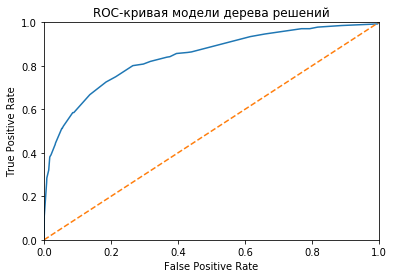

In [22]:
# параметр is_valid = False, значит, что используем для расчета метрик тестовую выборку вместо валидационной
print("Метрики модели дерева решений на тестовой выборке:")
print_score(tree_model_ups, is_valid=False, auc_roc_on=True)

probabilities_test = tree_model_ups.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
#   устанавливаем границы осей от 0 до 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#   подписываем оси 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#  добавляем к графику заголовок 
plt.title('ROC-кривая модели дерева решений')
plt.show()

Метрики модели случайного леса на тестовой выборке:
F1     = 0.61   Accuracy = 0.86
Recall = 0.54   Precision= 0.70
AUC-ROC= 0.84 
УСПЕХ !!!



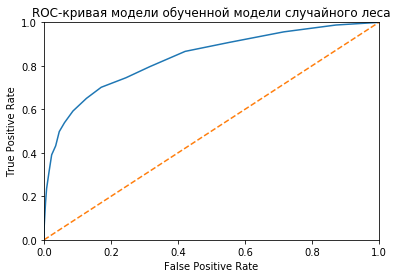

In [23]:
print("Метрики модели случайного леса на тестовой выборке:")
print_score(forest_model_down, is_valid=False, auc_roc_on=True)

probabilities_test = forest_model_down.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
#   устанавливаем границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#   подписываем оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#  добавляем к графику заголовок 
plt.title('ROC-кривая модели обученной модели случайного леса')
plt.show()

**Вывод** Поставленные цели достигнуты. Все метрики заметно лучше уровня случайной модели. Полученные модели могут быть использованы для предсказаний результата на практике.

## Общий вывод

1. Получен файл из 10000 подготовленных объектов с 14-ю признаками, в числе которых целевой бинарный признак для всех имеющихся объектов, а также категорийные тестовые признаки, и численные с большим диапазоном значений. В столбце Tenure присутствовали пропуски. Данные были подготовлены - изменены заголовки, заменены пропуски на средние значение по клиентскому возрасту, текстовые категорийные признаки переведены в числовые прямым кодированием, параметр Surname удален, так как с одной стороны он напрямую зависит от параметра CustomerId, с другой при переводе в числовой формат прямым кодированием резко увеличивал размер предоставленных данных, что ухудшало метрики и скорость расчета на порядок. Впрочем, при использовании порядкового метода кодировки его присутствие не ухудшало результат (код с порядковым кодированием закомментирован и оставлен в проекте).
2. Численные параметры были масштабированы. Для масштабирования были выбраны колонки 'row_number','balance', 'credit_score', 'estimated_salary', 'customer_id','age','tenure'. Это дало максимальный результат в финальных метриках.
3. При таких данных используются методы обучения с учителем. Для обучения выбраны следующие методы: "дерево решений", "случайный лес" и "логистическая регресия". Все объекты разделены на три части - обучающую 60%, валидационную и тестовую по 20%. Разделение происходило случайным образом c фиксированным параметром random_state =12345. Между численными параметрами корреляции не обнаружено.
4. В целевом признаке обнаружен дисбаланс в пользу отрицательного класса в соотношении 80/20
5. Исследованы модели обучения на несбалансированной выборке. Лучший результат f1-меры показал метод дерево решений при глубине ветвлений = 7, была практически достигнута цель 0.59, но с низким уровнем точности предсказаний.
6. Исследована модели обучения на несбалансированной выборке, но с гиперпараметром class_weight='balanced, лучший результат метрики f1 также получился у модели  дерева решений с гиперпараметром max_depth = 7, была достигнута цель 0.59, но также с никим уровнем точности предсказаний равным случайной модели.
7. Были сбалансированы учебные выборки методами up и down sampling c множителем 3 и коэффициентом 0.6 подготовлены две выборки для моделирования.
8. Исследована все модели на сбалансированных выборках. Лучшие результаты f1 меры были достигнуты в моделях решающего дерева и случайного леса при всех сбалансированных выборках. Максимальные достигнутые метрики, на мой взгляд были достигнуты при обучении выборки upsampling методом случайного леса с количеством деревьев 19 и это: f1 - 0.6 Accuracy - 0.85, полнота - 0.52, точность - 0.71, AUC-ROC - 0.85. Впрочем на тестовой выборке акценты сместились к содели дерева решений.....модели капризны.
9. Отмечу, что метрика AUC-ROC не имеет прямой зависимости от f1, последняя очень чувствительна от параметров обучения, AUC-ROC более стабильна.
10. Полученные успешные модели проверены на тестовой выборке. Результат подтверждены. Построены тестовые roc-кривые, на которых видно что  полученные модели заметно отличаются от случайной модели и могут быть использованы для практических применений. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*